In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def harvest():
    maximum_growth_rate = 0.5 # 1 / year
    carrying_capacity = 2e6 # tons
    maximum_harvest_rate = 0.7 * 2.5e5 # tons / year
    
    end_time = 10. # years
    h = 0.1 # years
    num_steps = int(end_time / h)
    times = h * np.array(range(num_steps + 1))

    fish = np.zeros([num_steps + 1]) # tons
    fish[0] = 2e5
    results = []

    for ramp_start in np.arange(2., end_time, 0.5):
        for ramp_end in np.arange(ramp_start, end_time, 0.5):
            if ramp_end == ramp_start:
                continue
            is_extinct = False
            total_harvest = 0

            for step in range(num_steps):
                time = h * step # years
                harvest_factor = 0.0
                if time > ramp_end:
                    harvest_factor = 1.0
                elif time > ramp_start:
                    harvest_factor = (time - ramp_start) / (ramp_end - ramp_start)
                harvest_rate = harvest_factor * maximum_harvest_rate
                if is_extinct:
                    current_harvest = 0.
                    fish_next_step = 0.
                else:
                    current_harvest = h * harvest_rate
                    fish_next_step = fish[step] + h * (maximum_growth_rate * (1. - fish[step] / carrying_capacity) * fish[step] - harvest_rate)
                    if fish_next_step <= 0.:
                        is_extinct = True
                        current_harvest = fish[step]
                        fish_next_step = 0.

                fish[step + 1] = fish_next_step
                total_harvest += current_harvest

            results.append((ramp_start, ramp_end, total_harvest))

    return results

#### Optimale start- en eindtijd voor visvangst (vanaf 2 jaar)

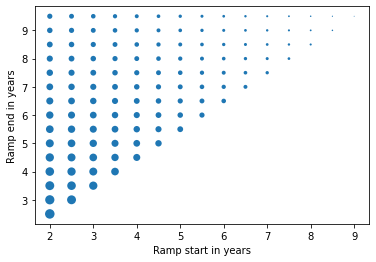

In [7]:
results = harvest()
plt.scatter([r[0] for r in results], [r[1] for r in results], [5e-11 * r[2] ** 2. for r in results], edgecolor = 'none')
axes = plt.gca()
axes.set_xlabel('Ramp start in years')
axes.set_ylabel('Ramp end in years')
plt.show()

In [8]:
def optimal_start_end(results):
    highest = 0
    optimal_start_end = (0, 0)
    for i in results:
        if i[2] > highest:
            highest = i[2]
            optimal_start_end = (i[0], i[1])
    return optimal_start_end

print(f"De optimale start- en eindtijd is {optimal_start_end(results)}")

De optimale start- en eindtijd is (2.0, 2.5)
